<a href="https://colab.research.google.com/github/AnnieChen1130/practice/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy
!pip install newsapi-python

In [2]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [3]:
import en_core_web_lg
from newsapi import NewsApiClient

In [4]:
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='11b8068b51464402b16925bb1504a481')

In [32]:
for pagina in range(1,6):
  articles = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-22', to='2021-03-21', sort_by='relevancy', page=pagina)
  print(articles)

{'status': 'ok', 'totalResults': 100907, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Jonathan Wolfe and Amelia Nierenberg', 'title': 'Coronavirus Briefing: What Happened Today', 'description': 'People with underlying conditions are begging officials to add their condition to the vaccine priority list.', 'url': 'https://www.nytimes.com/2021/03/09/us/coronavirus-briefing-what-happened-today.html', 'urlToImage': 'https://static01.nyt.com/images/2021/03/09/multimedia/09coronavirus-nl/09coronavirus-nl-facebookJumbo.png', 'publishedAt': '2021-03-09T23:04:24Z', 'content': 'But medical ethicists say the list is misleading because it suggests that the risks for all medical conditions have been evaluated and ranked. Is a 50-year-old with Type 1 diabetes at higher risk tha… [+1300 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Jonathan Wolfe and Amelia Nierenberg', 'title': 'Coronavirus Briefing: What Happened Today', 'description': 'The U.S

In [33]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [34]:
import json
json_format = json.dumps(articles)

print(type(json_format))

json_format = json.loads(json_format)
print(json_format["articles"])

<class 'str'>
[{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Jack Healy', 'title': 'Covid-Battered Texas Faces Costly Recovery After Winter Storm', 'description': 'Basics remain scarce in some parts of Texas, and many already battered by a year of the coronavirus now face a costly recovery.', 'url': 'https://www.nytimes.com/2021/02/22/us/texas-winter-storm-recovery.html', 'urlToImage': 'https://static01.nyt.com/images/2021/02/22/us/22texas-killeen/22texas-killeen-07-facebookJumbo.jpg', 'publishedAt': '2021-02-22T23:07:34Z', 'content': 'It was just crisis after crisis, said Chris Mendoza, an Army veteran who was still recovering from Covid-19 when a bathroom pipe burst and flooded his family out of their home.\r\nThey could not afford… [+1265 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Alan Blinder and Kevin Draper', 'title': 'Pandemic Insurance Helped the N.C.A.A. Tournament and Others', 'description': 'Event cancellation insurance is a speci

In [35]:
import pandas as pd

dados = []
for i, article in enumerate(articles):
    for x in json_format['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        date = x['publishedAt']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,Covid-Battered Texas Faces Costly Recovery Aft...,2021-02-22T23:07:34Z,"Basics remain scarce in some parts of Texas, a...","It was just crisis after crisis, said Chris Me..."
1,Pandemic Insurance Helped the N.C.A.A. Tournam...,2021-02-26T22:05:06Z,Event cancellation insurance is a specialized ...,The N.C.A.A. has been buying coverage for its ...
2,"At America’s Cup, Auckland Laments the Boats T...",2021-03-04T15:30:07Z,With strict coronavirus rules keeping out supe...,"One superyacht agent, Mark Wightman, said he h..."
3,Texas and Other States Reopen as Covid Cases Fall,2021-03-02T21:48:28Z,"As coronavirus cases fall, states are rescindi...",It was an exhilarating feeling to see that hap...
4,Inside One Funeral Home in Los Angeles,2021-03-05T13:51:22Z,Friday: A reporter on what he saw at a funeral...,LOS ANGELES I thought I understood the Covid-1...


In [36]:
import spacy  
import string  


def get_keywords_eng(content):
  # Storing the sets of punctuation in variable result  
  punctuation = string.punctuation  
  pos_tag = ['PROPN', 'VERB', 'NOUN']    

  nlp = spacy.load("en_core_web_sm")
  doc = nlp(content)

  result = []

  for token in doc:
      #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
      if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
        continue
      if (token.pos_ in pos_tag):
        result.append(token.text)
  return result

In [37]:
import collections

results = []

for content in df.content.values:
    results.append([('#' + x[0]) for x in collections.Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

print(df['keywords'])
 

0             [#crisis, #said, #Chris, #Mendoza, #Army]
1     [#N.C.A.A., #buying, #coverage, #mens, #basket...
2        [#superyacht, #agent, #Mark, #Wightman, #said]
3            [#feeling, #happen, #said, #Mr., #Medford]
4     [#LOS, #ANGELES, #thought, #understood, #Covid...
5      [#David, #Mowery, #Alabama, #based, #consultant]
6     [#Facebook, #label, #posts, #discussing, #coro...
11           [#March, #a.m., #ET, #LiveUpdated, #world]
12    [#review, #concluded, #government, #invest, #p...
13         [#Suarez, #March, #cousin, #gone, #Patricks]
14       [#Feb., #a.m., #ET, #LiveUpdated, #initiative]
15            [#Feb., #a.m., #ET, #LiveUpdated, #state]
16         [#hole, #García, #began, #Thursdays, #round]
17       [#March, #a.m., #ET, #LiveUpdated, #President]
18     [#March, #a.m., #ET, #LiveUpdated, #coronavirus]
19    [#Researchers, #University, #Oxford, #determin...
20            [#crisis, #said, #Chris, #Mendoza, #Army]
21    [#N.C.A.A., #buying, #coverage, #mens, #ba

In [38]:
df.to_excel("output.xlsx") 

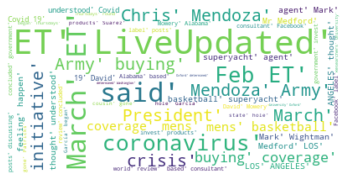

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()